<a href="https://colab.research.google.com/github/gantaphani/Phanesh_INFO5502_Spring2022/blob/main/lab_assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The fourth Lab-assignment (02/17/2022, 50 points in total)

The purpose of this exercise is to understand Exploratory Data Analysis, we will practice the EDA by working on multiple datasets which have different characteristics.

Question 1 (15 points). Understand a text corpus for domain-specific text classification. Download the dataset from the following link: https://osf.io/8mjcy/ . Conduct EDA of the dataset from the following aspects:

(1) How many categories in total?

(2) How many documents under each category?

(3) What is the avergae number of sentence (on average)?

(4) What is the average number of words (on average)?

(5) Visualize the top 50 terms and rank the terms by frquency (remove stop words first: https://gist.github.com/sebleier/554280).

In [2]:
!git clone https://github.com/gantaphani/cases.git

Cloning into 'cases'...
remote: Enumerating objects: 29482, done.
remote: Counting objects: 100% (29482/29482), done.
remote: Compressing objects: 100% (29481/29481), done.
remote: Total 29482 (delta 0), reused 29482 (delta 0), pack-reused 0
Receiving objects: 100% (29482/29482), 217.55 MiB | 10.17 MiB/s, done.
Checking out files: 100% (29404/29404), done.


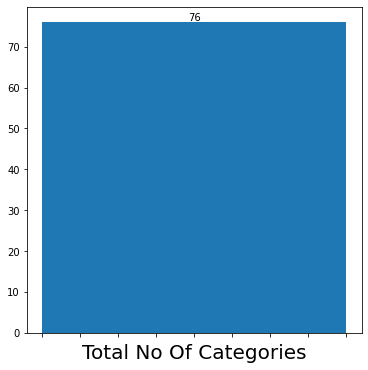

In [3]:
#There are only 76 folders,46 and 48 are missing
import os
import matplotlib.pyplot as plt
import numpy as np

categories=0

for category in os.listdir('/content/cases'):
  if not category.startswith('.git'):
    categories+=1

plt.figure(figsize=(6,6))
plt.bar(10,categories)
plt.xlabel('Total No Of Categories',fontsize=20)

ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    new_width = width * 1
    patch.set_width(new_width)
    x = patch.get_x()
    patch.set_x(x + (width - new_width) / 2)
    ax.text(x=x + width/2, y=height, s=height, ha='center', va='bottom')

plt.show()

Total NUMBER OF DOCUMENTS: 29404


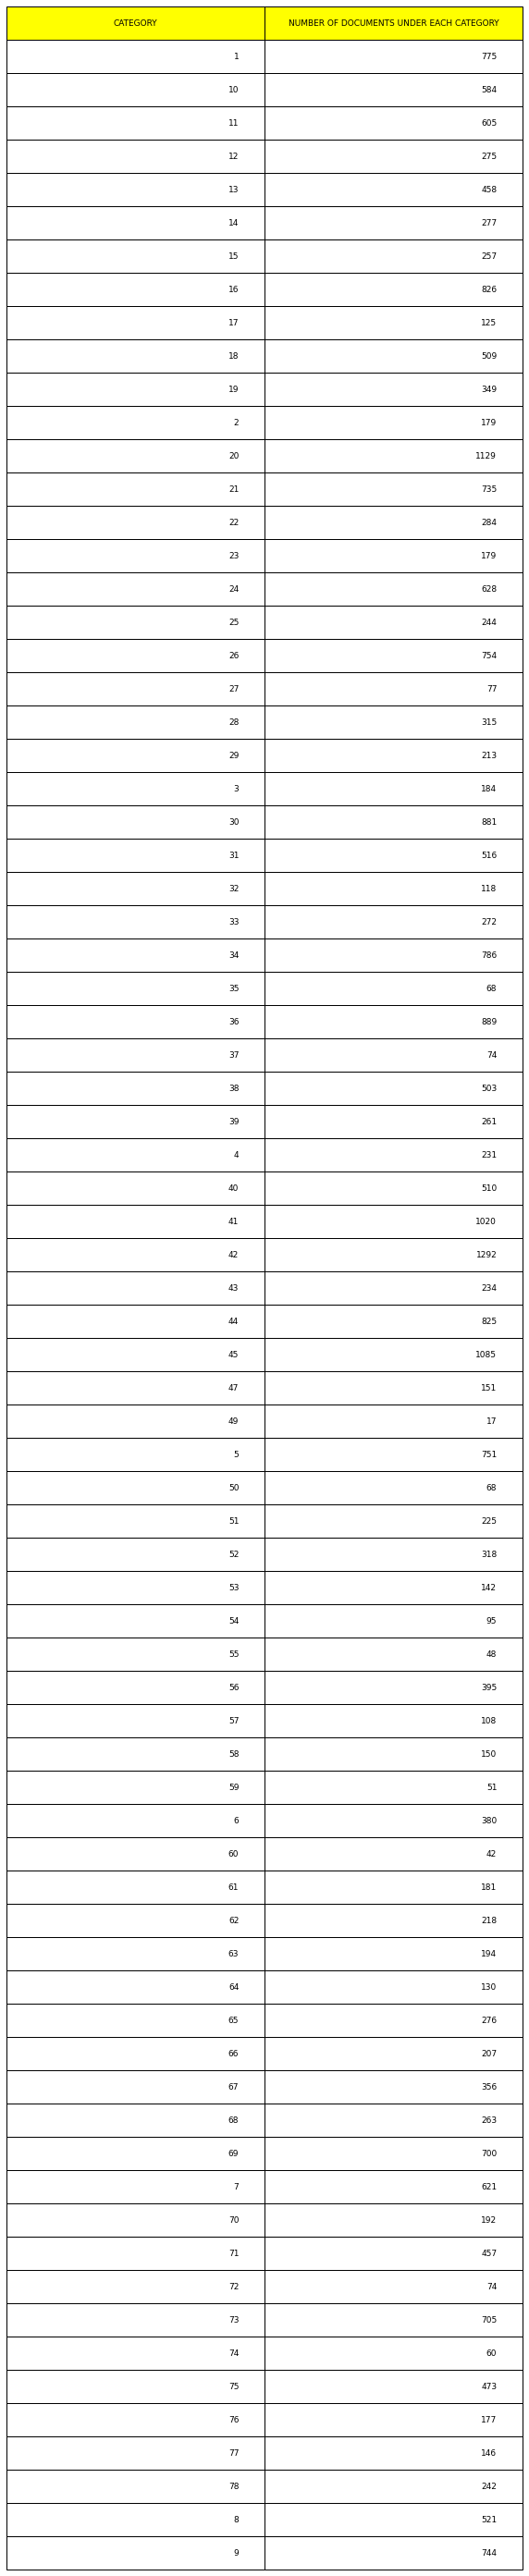

In [4]:
import pandas as pd
import seaborn as s

Counts=[]
totalCount=0

def categoryDocumentCount(folder):
    global totalCount
    count = 0

    for sub in os.listdir(folder):
        path = os.path.join(folder, sub)
        if os.path.isfile(path):
            if sub.startswith('case'):
              count += 1
        else:
          categoryDocumentCount(path)

    if folder not in Counts and not folder.__contains__('.git'):
      if folder.find('s/')>=0:
        Counts.append([folder[folder.index('s/')+2:],count])
        totalCount+=count

categoryDocumentCount('/content/cases')
result=pd.DataFrame(Counts,columns=['CATEGORY','NUMBER OF DOCUMENTS UNDER EACH CATEGORY'])
result.sort_values(['CATEGORY'],inplace=True)

print('Total NUMBER OF DOCUMENTS: '+str(totalCount))
fig, ax =plt.subplots(1,1)
fig.set_size_inches(10, 10, forward=True)
ax.axis('off')
tab=ax.table(cellText=result.values,colLabels=result.columns,loc="center",colColours =["yellow"] * 2)
tab.scale(1, 3)
plt.show()

In [5]:
#Counting average of sentence,words
import os
from collections import Counter
from wordcloud import WordCloud

totalSentenceCount=0
totalFileCount=0
totalWordCount=0
words=dict()
topWords=''

(pd.read_csv('https://gist.githubusercontent.com/sebleier/554280/raw/7e0e4a1ce04c2bb7bd41089c9821dbcf6d0c786c/NLTK\'s%2520list%2520of%2520english%2520stopwords',sep='\n',header=None)).to_csv('stopwords.txt',sep=',',header=False,index=False)
stopwords=open('/content/stopwords.txt','r').read().strip('\n').split('\n')
def sentenceWordsCount(folder):
    global totalSentenceCount
    global totalFileCount
    global totalWordCount

    for sub in os.listdir(folder):
        path = os.path.join(folder, sub)
        if os.path.isfile(path):
          if sub.startswith('case'):
            data=open(path, 'r').read()
            totalSentenceCount+=len(data.strip('\n').split('.'))
            for sent in data.strip('\n').split('.'):
              for word in sent.split():
                if word in words and word not in stopwords:
                  words[word]+=1
                else:
                  if word not in stopwords:
                    words[word]=1
              totalWordCount+=len(sent.split())
            totalFileCount+=1
        else:
          sentenceWordsCount(path)

sentenceWordsCount('/content/cases')

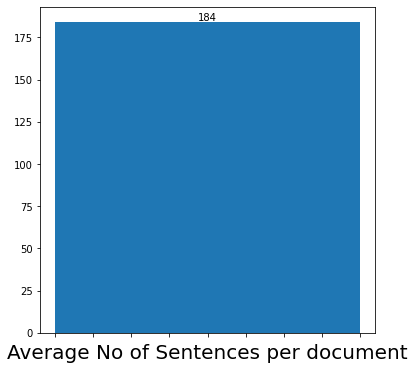

In [6]:
plt.figure(figsize=(6,6))
plt.bar(10,round(totalSentenceCount/totalFileCount))
plt.xlabel('Average No of Sentences per document',fontsize=20)

ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    new_width = width * 1
    patch.set_width(new_width)
    x = patch.get_x()
    patch.set_x(x + (width - new_width) / 2)
    ax.text(x=x + width/2, y=height, s=height, ha='center', va='bottom')

plt.show()

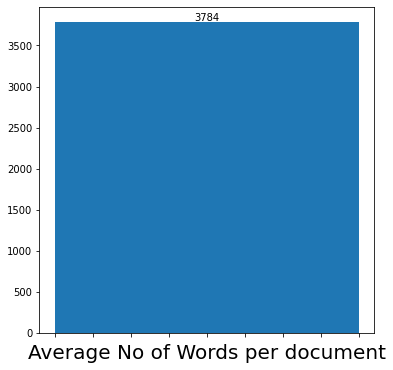

In [7]:
plt.figure(figsize=(6,6))
plt.bar(10,round(totalWordCount/totalFileCount))
plt.xlabel('Average No of Words per document',fontsize=20)

ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    new_width = width * 1
    patch.set_width(new_width)
    x = patch.get_x()
    patch.set_x(x + (width - new_width) / 2)
    ax.text(x=x + width/2, y=height, s=height, ha='center', va='bottom')

plt.show()

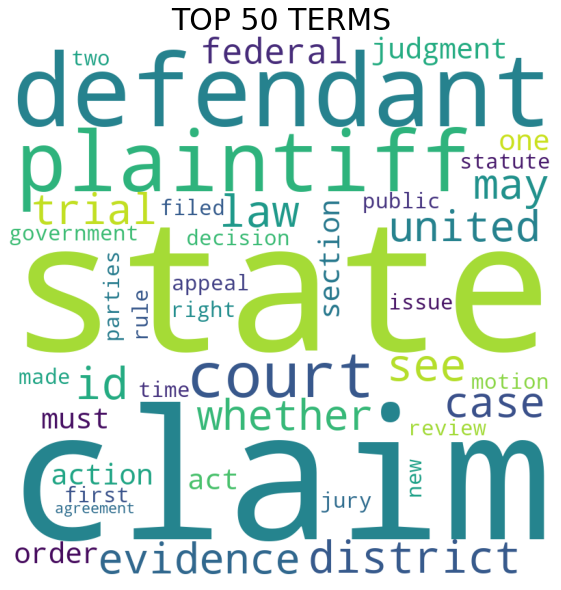

In [8]:
from importlib import reload
plt=reload(plt)

topWords += " ".join(dict(Counter(words).most_common(50)).keys())+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(topWords)
 
# plot the WordCloud image                 
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("TOP 50 TERMS",fontsize=30)
plt.tight_layout(pad = 0)
 
plt.show()

Question 2 (20 points). Continue practicing how to do simple exploratory data analysis with Python. The dataset that has been used in this question is called Student Academics Performance Data Set, which can be downloaded at: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/lab-assignment-04-student-performance.csv . Please conduct the following analysis:

(1) Description of all the columns: for each colmun, count number of rows, number of unqiue element, the frequency of each unqiue element. 


(2)  Visualize the count for each value in the 'Study Hours' column. Note: Study Hours values comes from this >= 6 hours Good >= 4 hours Average < 2 hours Poor.

(3) Using factorplot to show the relationship between numerical and categorical value. Please use figure to show relation between [Study Hours] and [End Semester Percentage]. Percentage is calculated based on the following:

if percentage >=80 then Best
If percentage >= 60 but less than 80 then Very Good
If percentage >= 45 but less than 60 then Good
If Percentage >= 30 but less than 45 then Pass
If Percentage < 30 then Fail

(4) Get the correlation from the data, then plug it to heatmap function and show it as following:

![heatmap.png](attachment:heatmap.png)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as s
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [10]:
studentPerformance=pd.read_csv('https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab-assignment-04-student-performance.csv',sep=',')
print('#####Columns in the Dataset#####')
print(studentPerformance.columns)

print('\n#####Description of all the columns#####')
print('ge Stands for Student\'s Gender')
print('cst Stands for Student\'s Caste')
print('tnp Stands for Class X Percentage')
print('twp Stands for Class XII Percentage')
print('iap Stands for Internal Assessment Percentage')
print('esp Stands for End Semester Percentage')
print('arr Stands for whether the student has back or arrear papers')
print('ms Stands for Martial Status')
print('ls Stands for Lived in Town or Village')
print('as Stands for Admission Category')
print('fmi Stands for Family Monthly Income')
print('fs Stands for Family Size')
print('fq Stands for Father\'s Qualification')
print('mq Stands for Mother\'s Qualification')
print('fo Stands for Father\'s Occupation')
print('mo Stands for Mother\'s Occupation')
print('nf Stands for No of Friends')
print('sh Stands for Study Hours')
print('ss Stands for School attended by Student at X standard')
print('me Stands for Medium')
print('tt Stands for Travel Time from Home to College')
print('atd Stands for Attendance Percentage')

print("\n#####Number of Rows for each column#####")
for name in studentPerformance.columns:
  print(name,' ',len(studentPerformance[name]))

print("\n#####Number of unique elements in a column#####")
print(studentPerformance.nunique())

print("\n#####Frequency of each unique element in a column#####")
for name in studentPerformance.columns:
  print(name,' ',dict(studentPerformance[name].value_counts()))

#####Columns in the Dataset#####
Index(['ge', 'cst', 'tnp', 'twp', 'iap', 'esp', 'arr', 'ms', 'ls', 'as', 'fmi',
       'fs', 'fq', 'mq', 'fo', 'mo', 'nf', 'sh', 'ss', 'me', 'tt', 'atd'],
      dtype='object')

#####Description of all the columns#####
ge Stands for Student's Gender
cst Stands for Student's Caste
tnp Stands for Class X Percentage
twp Stands for Class XII Percentage
iap Stands for Internal Assessment Percentage
esp Stands for End Semester Percentage
arr Stands for whether the student has back or arrear papers
ms Stands for Martial Status
ls Stands for Lived in Town or Village
as Stands for Admission Category
fmi Stands for Family Monthly Income
fs Stands for Family Size
fq Stands for Father's Qualification
mq Stands for Mother's Qualification
fo Stands for Father's Occupation
mo Stands for Mother's Occupation
nf Stands for No of Friends
sh Stands for Study Hours
ss Stands for School attended by Student at X standard
me Stands for Medium
tt Stands for Travel Time from Hom

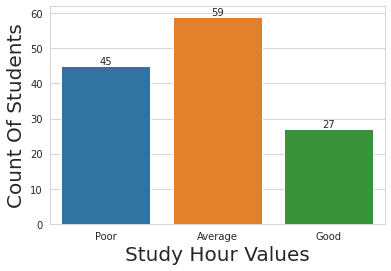

In [12]:
s.set_style('whitegrid')
ax=s.countplot(x='sh',data=studentPerformance)
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    new_width = width * 1
    patch.set_width(new_width)
    x = patch.get_x()
    patch.set_x(x + (width - new_width) / 2)
    ax.text(x=x + width/2, y=height, s=height, ha='center', va='bottom')
plt.xlabel('Study Hour Values',fontsize=20)
plt.ylabel('Count Of Students',fontsize=20)
plt.show()

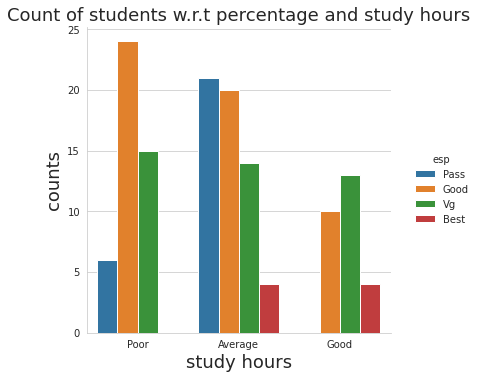

In [13]:
from importlib import reload
plt=reload(plt)

s.set_style('whitegrid')
studentPerformance['counts']=studentPerformance.groupby(['sh','esp'])['esp'].transform('count')
ax=s.factorplot(x='sh',y='counts',hue='esp',data=studentPerformance,hue_order=['Pass','Good','Vg','Best'],kind='bar')
plt.title('Count of students w.r.t percentage and study hours',fontsize=18)
plt.xlabel('study hours',fontsize=18)
plt.ylabel('counts',fontsize=18)
plt.show()

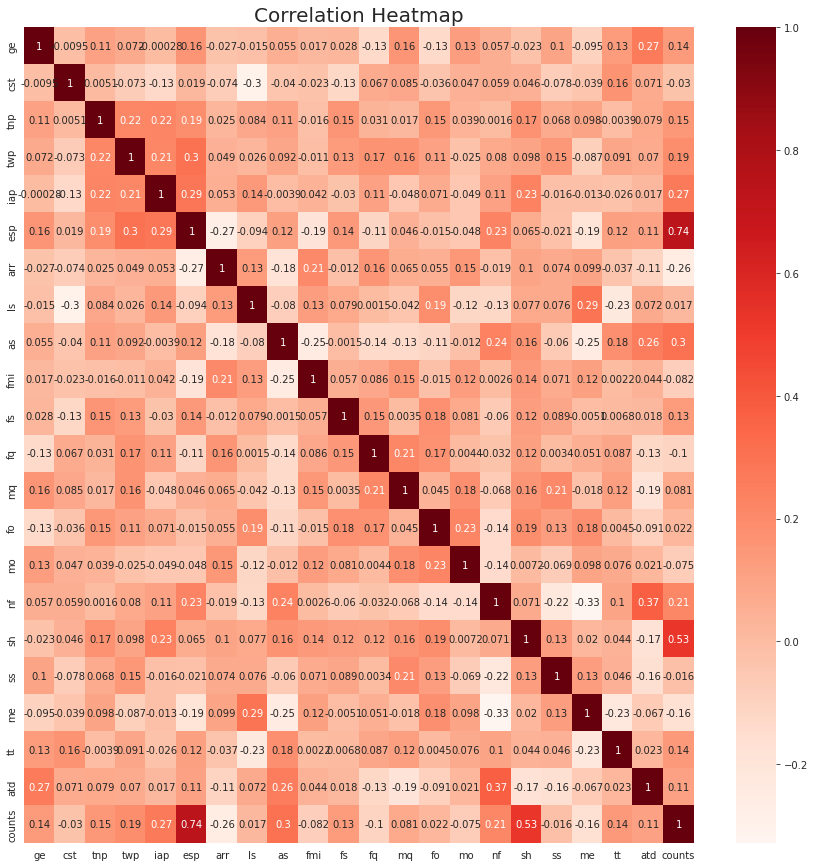

In [14]:
from importlib import reload
plt=reload(plt)

correlationDataset=studentPerformance.copy()

for columnname,values in correlationDataset.iteritems():
  if len(correlationDataset[columnname].unique())==1:
    to_drop=columnname

correlationDataset.drop(to_drop,inplace=True,axis=1)
correlation = correlationDataset.apply(lambda x: x.factorize()[0]).corr()
plt.figure(figsize=(15,15))
s.heatmap(correlation, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

Question 3 (15 points). Download a dataset from Kaggle or other sources. Propose three questions that you wanna to know from the dataset, then write python code to conduct EDA analysis to answer the three questions

In [ ]:
# Your three questions:

'''
Dataset Name: Titanic Dataset
Source: https://www.kaggle.com/c/titanic/data?select=train.csv

Number of Attributes: 12

1.Find which type of Passenger class have survived the most and least.
2.Find the average age for each Passenger class.
3.Find which Age group have survived the most and least w.r.t Sex.
'''

'\nPlease list your questions here:\n\n\n\n\n\n'

In [15]:
#importing pandas,Matplotlib and Seaborn libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as s

In [16]:
#Reading the csv file from github
titanicDataset=pd.read_csv('https://raw.githubusercontent.com/gantaphani/Phanesh_INFO5502_Spring2022/main/Titanic%20Dataset.csv',sep=',')
print(titanicDataset.head(5).to_string(index=False))

 PassengerId  Survived  Pclass                                                Name    Sex  Age  SibSp  Parch           Ticket    Fare Cabin Embarked
           1         0       3                             Braund, Mr. Owen Harris   male 22.0      1      0        A/5 21171  7.2500   NaN        S
           2         1       1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0      1      0         PC 17599 71.2833   C85        C
           3         1       3                              Heikkinen, Miss. Laina female 26.0      0      0 STON/O2. 3101282  7.9250   NaN        S
           4         1       1        Futrelle, Mrs. Jacques Heath (Lily May Peel) female 35.0      1      0           113803 53.1000  C123        S
           5         0       3                            Allen, Mr. William Henry   male 35.0      0      0           373450  8.0500   NaN        S


In [17]:
#Size of the DataFrame
rows,columns=titanicDataset.shape
print("Number of Rows are:",rows)
print("Number of Columns are:",columns)

Number of Rows are: 891
Number of Columns are: 12


In [18]:
#summary statastics for a DataFrame
print(titanicDataset.describe().to_string())

       PassengerId    Survived      Pclass         Age       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [19]:
#Finding missing values and dropping them
print(titanicDataset.isnull().any())
print("Age,Cabin and Embarked columns has missing values")
titanicDataset.dropna(inplace=True)
print("\nAfter Dropping Missing Values")
print(titanicDataset.isnull().any())
titanicDataset.to_csv('res.csv',sep=',')

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool
Age,Cabin and Embarked columns has missing values

After Dropping Missing Values
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool


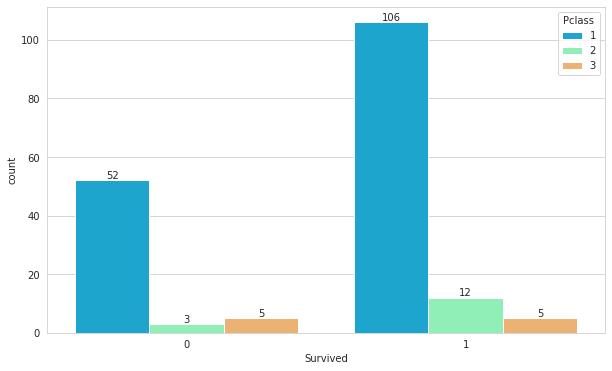


 Passengers class 1 have survived more

 Passengers class 3 have survived less

 0 means Surived,1 means not Survived


In [21]:
#Count plot
from importlib import reload
plt=reload(plt)

plt.figure(figsize = (10,6))
s.set_style('whitegrid')
ax=s.countplot(x='Survived',hue='Pclass',data=titanicDataset,palette='rainbow')
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    new_width = width * 1
    patch.set_width(new_width)
    x = patch.get_x()
    patch.set_x(x + (width - new_width) / 2)
    ax.text(x=x + width/2, y=height, s=height, ha='center', va='bottom')
plt.show()

print("\n Passengers class 1 have survived more")
print("\n Passengers class 3 have survived less")
print("\n 0 means Surived,1 means not Survived")

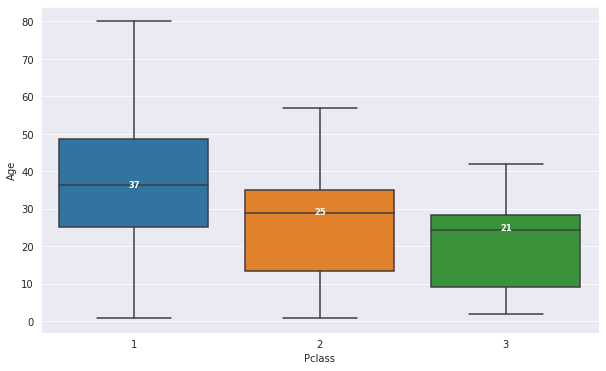


 The average Age for Passenger class 1 is  37

 The average Age for Passenger class 2 is  25

 The average Age for Passenger class 3 is  21


In [22]:
#Box plot
from importlib import reload
plt=reload(plt)

plt.figure(figsize = (10,6))
s.set_style('darkgrid')
ax=s.boxplot(x='Pclass',y='Age',data=titanicDataset)
means = titanicDataset.groupby(['Pclass'])['Age'].mean()
vertical_offset = 0 # offset from mean for display
index=0

for xtick in ax.get_xticks():

  if index==0:
    vertical_offset= titanicDataset['Age'].mean() *-0.05
  else:
    vertical_offset = titanicDataset['Age'].mean() *0.09

  ax.text(xtick,pd.DataFrame(means).iloc[index]['Age'] + vertical_offset,int(pd.DataFrame(means).iloc[index]['Age']), 
            horizontalalignment='center',size='small',color='w',weight='semibold')
  index+=1
            
plt.show()

print("\n The average Age for Passenger class 1 is ",int(pd.DataFrame(means).iloc[0]['Age'] ))
print("\n The average Age for Passenger class 2 is ",int(pd.DataFrame(means).iloc[1]['Age'] ))
print("\n The average Age for Passenger class 3 is ",int(pd.DataFrame(means).iloc[2]['Age'] ))

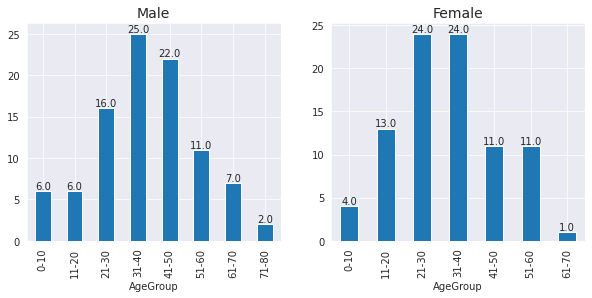


For Male, Age Group 31-40 have survived the most

For Female, Age Group 21-30 and 31-40 have survived the most

For Male, Age Group 71-80 have survived the least

For Female, Age Group 61-70 have survived the least


In [23]:
#Bar Plot
from importlib import reload
plt=reload(plt)

def AgeGroup(row):
  if 0 <= row['Age'] <=10:
    return '0-10'
  elif 11 <=row['Age'] <=20:
    return '11-20'
  elif 21 <=row['Age'] <=30:
    return '21-30'
  elif 31 <=row['Age'] <=40:
    return '31-40'
  elif 41 <=row['Age'] <=50:
    return '41-50'
  elif 51 <=row['Age'] <=60:
    return '51-60'
  elif 61 <=row['Age'] <=70:
    return '61-70'
  elif 71 <=row['Age'] <=80:
    return '71-80'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
titanicDataset['AgeGroup']=titanicDataset.apply(AgeGroup,axis=1)

plot1=titanicDataset[titanicDataset['Sex']=='male'].groupby(['AgeGroup'])['AgeGroup'].count().plot(kind='bar',stacked=True,ax=axes[0])
plot2=titanicDataset[titanicDataset['Sex']=='female'].groupby(['AgeGroup'])['AgeGroup'].count().plot(kind='bar',stacked=True,ax=axes[1])

for plot in plot1,plot2:
  for patch in plot.patches:
      height = patch.get_height()
      width = patch.get_width()
      new_width = width * 1
      patch.set_width(new_width)
      x = patch.get_x()
      patch.set_x(x + (width - new_width) / 2)
      plot.text(x=x + width/2, y=height, s=height, ha='center', va='bottom')

plot1.set_title("Male",fontsize=14)
plot2.set_title("Female",fontsize=14)
plt.show()

print("\nFor Male, Age Group 31-40 have survived the most")
print("\nFor Female, Age Group 21-30 and 31-40 have survived the most")
print("\nFor Male, Age Group 71-80 have survived the least")
print("\nFor Female, Age Group 61-70 have survived the least")